In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

%matplotlib inline


In [6]:
df = pd.read_csv("../datasets/amazon_bestsellers.csv")
print("Notebook Setup Complete!!")

Notebook Setup Complete!!


In [ ]:
## Notes
#This notebook will explore Amazon bestselling books data.
#Initial focus will be on data cleaning and basic exploratory analysis.


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB


In [8]:
df.describe()

,User Rating,Reviews,Price,Year
count,550.000000,550.000000,550.000000,550.000000
mean,4.618364,11953.281818,13.100000,2014.000000
std,0.226980,11731.132017,10.842262,3.165156
min,3.300000,37.000000,0.000000,2009.000000
25%,4.500000,4058.000000,7.000000,2011.000000
50%,4.700000,8580.000000,11.000000,2014.000000
75%,4.800000,17253.250000,16.000000,2017.000000
max,4.900000,87841.000000,105.000000,2019.000000


/var/folders/b8/ycqkxj3x1f57xhhdkr3h9nkm0000gn/T/ipykernel_10618/3064570719.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df, x = "Genre", palette='pastel', edgecolor='black')


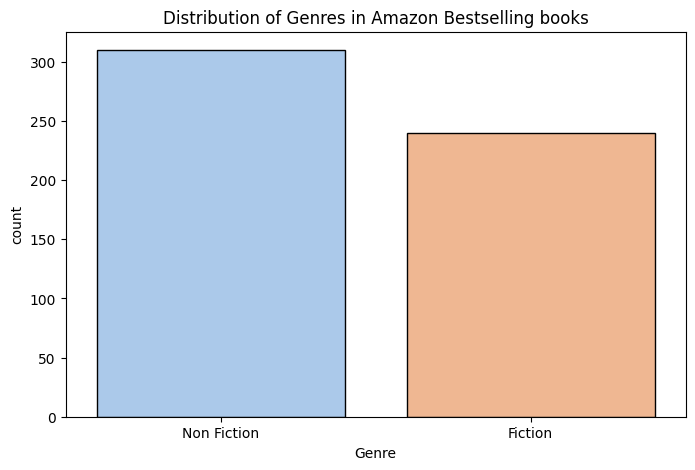

In [11]:
plt.figure(figsize=(8,5))
sns.countplot(data = df, x = "Genre", palette='pastel', edgecolor='black')
plt.title("Distribution of Genres in Amazon Bestselling books")
plt.show()